# Exploratory data analysis and Visualizations

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#reading the dataset
df = pd.read_csv("/content/seattle-weather_2.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,rain
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain


In [ ]:
#extracting month from the date to understand whih type of
#season is prevalent that month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda x: datetime.strftime(x, '%B'))

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012-01-01,0.0,12.8,5.0,4.7,rain,January
1,2012-01-02,10.9,10.6,2.8,4.5,rain,January
2,2012-01-03,0.8,11.7,7.2,2.3,rain,January
3,2012-01-04,20.3,12.2,5.6,4.7,rain,January
4,2012-01-05,1.3,8.9,2.8,6.1,rain,January


In [ ]:
print(df.shape)

(1461, 7)


In [ ]:
print(df.columns)

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'month'],
      dtype='object')


In [ ]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
month                    object
dtype: object

In [ ]:
#checking for null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   month          1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 80.0+ KB
None


In [ ]:
#descriptive statistics of our dataset
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
#checking the different classes
df['weather'].unique()

array(['rain', 'sun', 'cloud', 'fog'], dtype=object)

In [ ]:
#checking for bias and if the dataset  is imbalanced
df['weather'].value_counts()

rain     694
sun      640
fog      101
cloud     26
Name: weather, dtype: int64

# Data visualizations

Text(0.5, 1.0, 'Wind speed in each season')

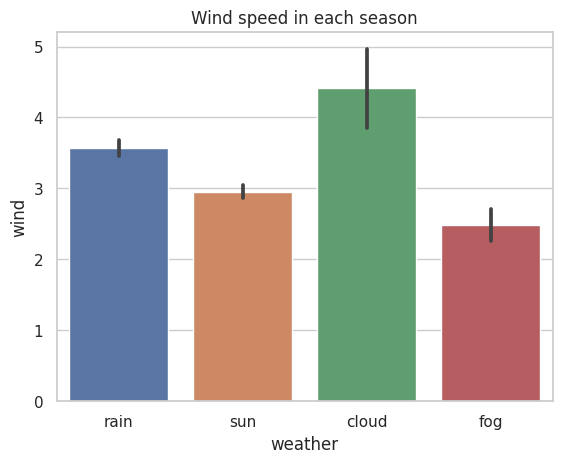

In [ ]:
sns.set_theme(style='whitegrid')
sns.barplot(x='weather', y='wind', data=df).set_title("Wind speed in each season")

Text(0.5, 1.0, 'Rain level in each season')

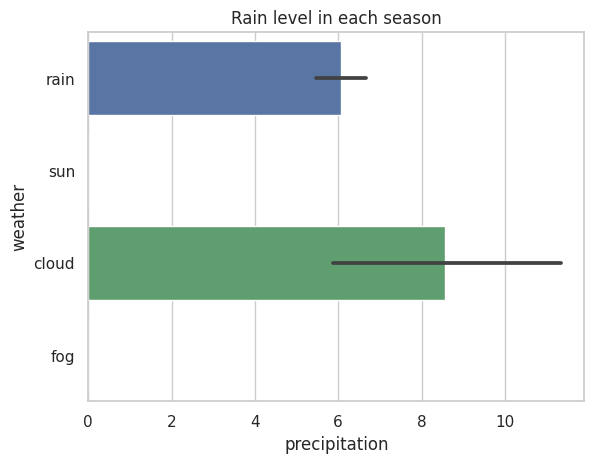

In [ ]:
sns.set_theme(style='whitegrid')
sns.barplot(x='precipitation', y='weather', data=df).set_title('Rain level in each season')


<Axes: >

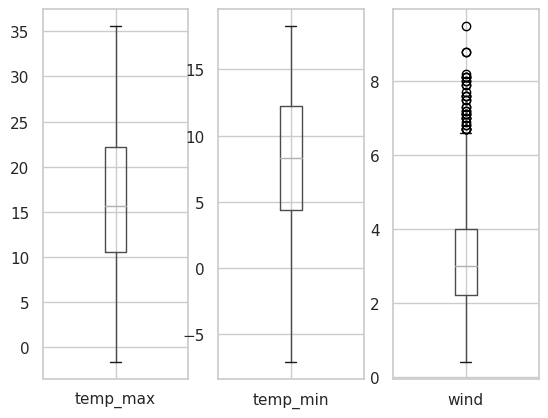

In [ ]:
# Identifing the outliers of all columns by using boxplokt diagrams
fig,axes = plt.subplots(nrows=1,ncols=3)
df.boxplot(column='temp_max',ax=axes[0])
df.boxplot(column= 'temp_min',ax=axes[1])
df.boxplot(column= 'wind',ax=axes[2])


<ipython-input-15-f841c04b45a8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

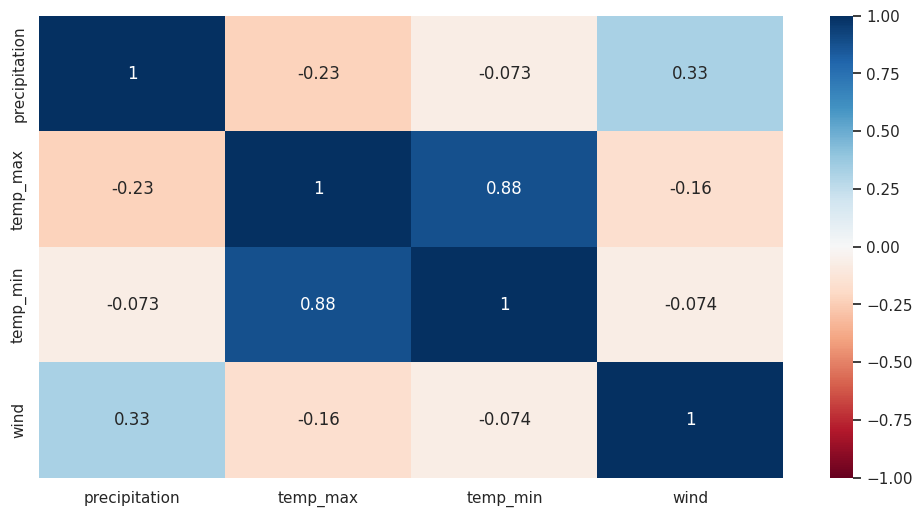

In [ ]:
# Displaying correlation matrix(heatmap) by using seaborn
np.random.seed(123)
sns.set_theme()
corr=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,vmin=-1,vmax=1,cmap='RdBu')

In [ ]:
nwd = pd.read_csv('seattle-weather_2.csv')

Mapping cloud to 0, fog to 1, rain to 2, sun to 3

In [ ]:
nwd['weather'] = nwd['weather'].map({'cloud' : 0, 'fog' : 1, 'rain' : 2, 'sun' : 3}).astype(int)

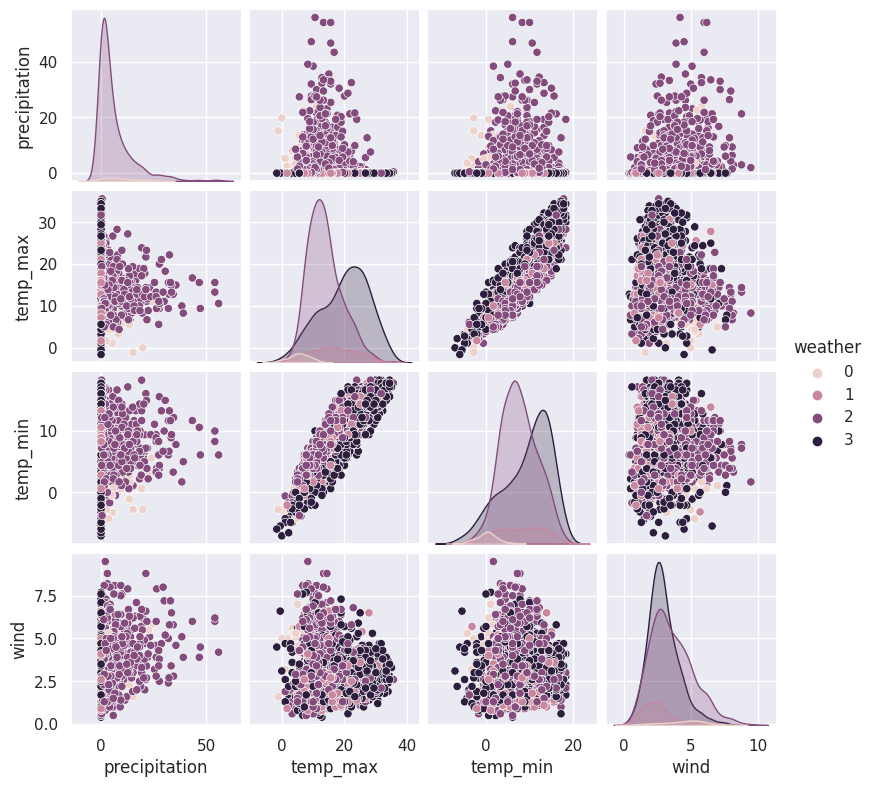

In [ ]:
plt.close()

sns.pairplot(nwd, hue = 'weather', height = 2)

plt.show()

## Model building - Gaussian Naive Bayes

In [ ]:
#Splitting our data in x and y variables
array = df.values
X = array[:,1:5]
Y = array[:,5]

In [ ]:
#Setting 33% of available data as testing dataset
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [ ]:
#loading gaussian naive bayes model into object
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score
result=accuracy_score(Y_pred,Y_test)

#print the Accuracy level

print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 83.851%


#Testing our model with input values

In [ ]:
gnb.predict([[10.9,10.6,2.8,4.5]])

array(['rain'], dtype='<U5')

In [ ]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, Y_test)))

Training set score: 0.8548
Test set score: 0.8385


#Model evaluation techniques - K fold

In [ ]:
n_splits=10


seed=7

kfold=KFold(n_splits, random_state=seed, shuffle=True)


scoring="accuracy"


results=cross_val_score (gnb, X, Y, cv=kfold, scoring=scoring)

print("Accuracy: %.3f (%.3f)"% (results.mean(), results.std()))

Accuracy: 0.849 (0.029)


In [ ]:
results

array([0.82312925, 0.81506849, 0.87671233, 0.89041096, 0.8630137 ,
       0.80821918, 0.88356164, 0.82191781, 0.84931507, 0.8630137 ])

In [ ]:

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       cloud       0.56      0.56      0.56         9
         fog       0.00      0.00      0.00        41
        rain       0.98      0.86      0.91       230
         sun       0.74      1.00      0.85       203

    accuracy                           0.84       483
   macro avg       0.57      0.60      0.58       483
weighted avg       0.79      0.84      0.80       483



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[  5,   0,   4,   0],
       [  0,   0,   0,  41],
       [  4,   0, 197,  29],
       [  0,   0,   0, 203]])

<Axes: >

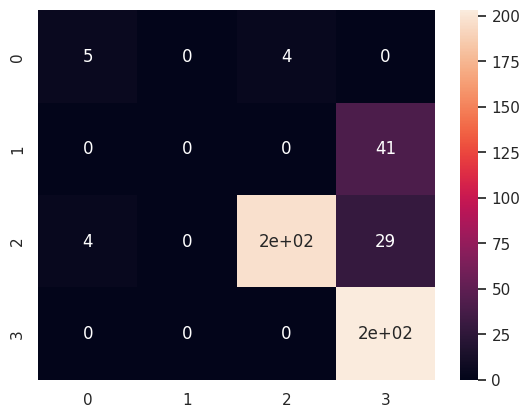

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

#K Nearest Neighbors

In [ ]:
dep_data = nwd['weather']

idep_data = nwd.drop(['date', 'weather'], axis = 1)

In [ ]:
idep_data.head(n=5)

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [ ]:
#Since the data is of different units , it we must normalize the dataset
data_scaling = preprocessing.MinMaxScaler()

idep_scaled = data_scaling.fit_transform(idep_data)

In [ ]:
scaled_data = pd.DataFrame(idep_scaled,columns = ['precipitation', 'temp_max', 'temp_min', 'wind'])

scaled_data.head(n=5)

,precipitation,temp_max,temp_min,wind
0,0.000000,0.387097,0.476378,0.472527
1,0.194991,0.327957,0.389764,0.450549
2,0.014311,0.357527,0.562992,0.208791
3,0.363148,0.370968,0.500000,0.472527
4,0.023256,0.282258,0.389764,0.626374


In [ ]:
seed= 123
idep_train, idep_test, dep_train, dep_test = train_test_split(scaled_data, dep_data, test_size = 0.2, random_state = seed)

In [ ]:
dep_test.value_counts()

2    144
3    123
1     22
0      4
Name: weather, dtype: int64

In [ ]:
k_neighbors_model = KNeighborsClassifier()

k_neighbors = k_neighbors_model.fit(idep_train,dep_train)

dep_predict = k_neighbors.predict(idep_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

c_m = confusion_matrix(dep_test, dep_predict)

print("Confusion Matrix : \n", c_m)

Confusion Matrix : 
 [[  3   0   1   0]
 [  0   3   8  11]
 [  0   2 114  28]
 [  0   7  25  91]]


In [ ]:
accuracy = accuracy_score(dep_test, dep_predict)

print("Accuracy of the classifier : ", round(accuracy,4), "or" ,round((accuracy * 100),3),"%")

Accuracy of the classifier :  0.7201 or 72.014 %


[Text(0.5, 1.0, 'Confusion Matrix'),
 Text(0.5, 19.049999999999997, 'Actual'),
 Text(46.25, 0.5, 'Predicted')]

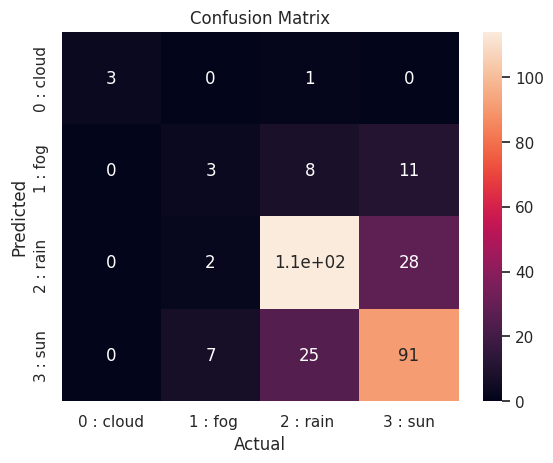

In [ ]:
xaxis_labels = ['0 : cloud', ' 1 : fog', '2 : rain ', '3 : sun']
yaxis_labels = ['0 : cloud', ' 1 : fog', '2 : rain ', '3 : sun']

heat_map = sns.heatmap(c_m, annot = True, xticklabels=xaxis_labels, yticklabels=yaxis_labels)

heat_map.set(title = 'Confusion Matrix', xlabel = 'Actual', ylabel = 'Predicted')

#Parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
k_neighbors_model_tuned = KNeighborsClassifier()

size_of_leaf = list(range(1,25))
neighbors_number = list(range(1,15))
metric = [1,2]

parameters = dict(leaf_size = size_of_leaf, n_neighbors = neighbors_number, p = metric)

grid_search = GridSearchCV(k_neighbors_model_tuned, parameters, cv = 15)


In [ ]:
grid_search.fit(idep_train, dep_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'p': [1, 2]})

In [ ]:
print("The optimal leaf size : ", grid_search.best_estimator_.get_params()['leaf_size'])
print("The optimal number of neighbors : ", grid_search.best_estimator_.get_params()['n_neighbors'])
print("The optimal metric : ", grid_search.best_estimator_.get_params()['p'])

The optimal leaf size :  1
The optimal number of neighbors :  14
The optimal metric :  1


In [ ]:

tunes_prediction = grid_search.predict(idep_test)

In [ ]:
tuned_accuracy = accuracy_score(dep_test, tunes_prediction)
print("Accuracy of the classifier after tuning : ", round(tuned_accuracy,4), "or" ,round((tuned_accuracy * 100),3),"%")

Accuracy of the classifier after tuning :  0.7474 or 74.744 %


In [ ]:
accuracy_data = [['PreTuning',round(accuracy*100)],['PostTuning',round(tuned_accuracy*100)]]
table_accuracies = pd.DataFrame(accuracy_data,columns = ['Pre/Post','Accuracy'] )

In [ ]:
table_accuracies.head()

,Pre/Post,Accuracy
0,PreTuning,72
1,PostTuning,75


In [ ]:
import plotly.express as px

fig = px.bar(table_accuracies, x = 'Pre/Post', y ='Accuracy', title = "Accuracy pre and post tuning")

fig.show()